<a href="https://colab.research.google.com/github/Carlosmtp/ML-CO2-Emissions/blob/main/ML_NN_CO2_Emissions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Informe Machine Learning *C02 Emissions* (redes neuronales) 🚗💨

#### *Carlos Mauricio Tovar Parra - 1741699*
#### *Santiago Duque Chacón - 2180099*
---

### Resumen

El presente informe, se centra en la experimentación con técnicas de machine learning para predecir las emisiones de dióxido de carbono (CO2) en vehículos. Utilizando un conjunto de datos de 1067 vehículos, el informe desarrolla modelos predictivos basados en las características de los vehículos: tamaño del motor (ENGINESIZE), cantidad de cilindros (CYLINDERS), consumo de combustible en ciudad (FUELCONSUMPTION_CITY) y en carretera (FUELCONSUMPTION_HWY). La variable objetivo es CO2EMISSIONS, clasificada en bajas (0) y altas (1) emisiones.

El objetivo del informe es implementar redes neuronales, probando diferentes topologías y ajustando los hiperparámetros para optimizar la predicción de emisiones.

*Tabla de atributos:*

| Número | Atributo                   | Descripción                                                        |
|--------|----------------------------|--------------------------------------------------------------------|
| 1      | ENGINESIZE                 | Tamaño del motor en litros                                         |
| 2      | CYLINDERS                  | Cantidad de cilindros que posee el motor                           |
| 3      | FUELCONSUMPTION_CITY       | Consumo de combustible del vehículo en zona urbana (L/100 km)      |
| 4      | FUELCONSUMPTION_HWY        | Consumo de combustible del vehículo en zona extraurbana (L/100 km) |
| 5      | CO2EMISSIONS               | Emisiones de CO2 del vehículo (0: Bajas, 1: Altas)                 |


*Ejemplo instancia de datos:*

| Atributo | 1   | 2  | 3    | 4   | 5 |
|----------|-----|----|------|-----|---|
| Valor    | 3.7 | 6  | 13.4 | 9.5 | 1 |


*Librerías Usadas:*
- numpy
- pandas
- sklearn

In [ ]:
import numpy as np
import pandas as pd
import sklearn

### 1) Se lee el archivo

In [ ]:
dataset_url = ("https://raw.githubusercontent.com/Carlosmtp/ML-CO2-Emissions/main/CO2%20emissions%20data.csv")
dataset = pd.read_csv(dataset_url, sep=",")
dataset.columns = ["ENGINESIZE",	"CYLINDERS",	"FUELCONSUMPTION_CITY",	"FUELCONSUMPTION_HWY",	"CO2EMISSIONS"]
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ENGINESIZE            1067 non-null   float64
 1   CYLINDERS             1067 non-null   int64  
 2   FUELCONSUMPTION_CITY  1067 non-null   float64
 3   FUELCONSUMPTION_HWY   1067 non-null   float64
 4   CO2EMISSIONS          1067 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 41.8 KB


*Variables cuantitativas continuas:*

In [ ]:
dataset.select_dtypes(include=['float64']).describe()

,ENGINESIZE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY
count,1067.000000,1067.000000,1067.000000
mean,3.346298,13.296532,9.474602
std,1.415895,4.101253,2.794510
min,1.000000,4.600000,4.900000
25%,2.000000,10.250000,7.500000
50%,3.400000,12.600000,8.800000
75%,4.300000,15.550000,10.850000
max,8.400000,30.200000,20.500000


*Variables cuantitativas discretas:*

In [ ]:
dataset.select_dtypes(include=['int64']).describe()

,CYLINDERS,CO2EMISSIONS
count,1067.000000,1067.000000
mean,5.794752,0.461106
std,1.797447,0.498719
min,3.000000,0.000000
25%,4.000000,0.000000
50%,6.000000,0.000000
75%,8.000000,1.000000
max,12.000000,1.000000


## 2) Se separan los datos en conjuntos de entrenamiento y prueba (80%, 20%)

In [ ]:
from sklearn.model_selection import train_test_split
N=len(dataset)
cTrain=int(N*0.8)
cTest=N-cTrain
print(N,cTrain,cTest)
train_data,test_data= sklearn.model_selection.train_test_split(dataset, train_size=cTrain, test_size=cTest)

1067 853 214


In [ ]:
dataset.shape

(1067, 5)

In [ ]:
dataset.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,CO2EMISSIONS
0,2.0,4,9.9,6.7,0
1,2.4,4,11.2,7.7,0
2,1.5,4,6.0,5.8,0
3,3.5,6,12.7,9.1,0
4,3.5,6,12.1,8.7,0


## 3) Se normalizan e imputan los datos

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

data_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

attribs = dataset.columns[0:-1]
full_pipeline = ColumnTransformer([
    ("num", data_pipeline, attribs),
])

X_train = full_pipeline.fit_transform(train_data)
X_train.shape

(853, 4)

In [ ]:
X_train[0,:]

array([-0.23823078,  0.10849756,  0.03621801,  0.28057808])

In [ ]:
y_train = train_data["CO2EMISSIONS"]
y_train

756    1
602    0
761    1
717    0
939    0
      ..
249    0
805    0
834    1
60     1
182    1
Name: CO2EMISSIONS, Length: 853, dtype: int64

## 4) Se entrenan las redes neuronales

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

modelo1 = MLPClassifier(activation='identity',solver='adam',hidden_layer_sizes=(3,5,2), random_state=123)
modelo1.fit(X_train, y_train)
scores1 = cross_val_score(modelo1, X_train, y_train, cv=5, scoring='accuracy')
print(scores1)
scores1.mean()

[0.95321637 0.9122807  0.94736842 0.96470588 0.95294118]


0.9461025111799106

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

modelo2 = MLPClassifier(activation='relu',solver='lbfgs',hidden_layer_sizes=(3,2), random_state=123, max_iter=1500)
modelo2.fit(X_train, y_train)
scores2 = cross_val_score(modelo2, X_train, y_train, cv=5, scoring='accuracy')
print(scores2)
scores2.mean()

[0.95906433 0.92982456 0.97076023 0.94705882 0.94705882]


0.9507533539731682

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

modelo3 = MLPClassifier(activation='identity',solver='lbfgs',hidden_layer_sizes=(5,), random_state=123)
modelo3.fit(X_train, y_train)
scores3 = cross_val_score(modelo3, X_train, y_train, cv=5, scoring='accuracy')
print(scores3)
scores3.mean()

[0.95321637 0.87719298 0.92982456 0.95294118 0.94117647]


0.9308703130374958

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

modelo4 = MLPClassifier(activation='logistic',solver='sgd',hidden_layer_sizes=(3,10,15), random_state=123)
modelo4.fit(X_train, y_train)
scores4 = cross_val_score(modelo4, X_train, y_train, cv=5, scoring='accuracy')
print(scores4)
scores4.mean()

[0.5380117  0.54385965 0.54385965 0.54117647 0.54117647]


0.5416167870657034

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

modelo5 = MLPClassifier(activation='tanh',solver='lbfgs',hidden_layer_sizes=(25,5,19,2), random_state=123)
modelo5.fit(X_train, y_train)
scores5 = cross_val_score(modelo5, X_train, y_train, cv=5, scoring='accuracy')
print(scores5)
scores5.mean()

[0.96491228 0.97076023 0.98245614 0.96470588 0.98235294]


0.9730374957000343

### Se analiza el desempeño en el conjunto de prueba

In [ ]:
X_test = full_pipeline.transform(test_data)
X_test

array([[-0.23823078,  0.10849756, -0.1114822 , -0.3031612 ],
       [ 0.25397544,  0.10849756,  0.18391822,  0.31706179],
       [ 1.02744235,  1.19730253,  0.43008524,  0.4265129 ],
       [-0.66012182, -0.98030741, -0.50534943, -0.52206342],
       [-1.22264321, -0.98030741, -0.87459996, -0.85041677],
       [-0.94138251, -0.98030741, -0.43149933, -0.55854713],
       [ 1.37901822,  1.19730253,  0.33161843,  0.31706179],
       [ 0.25397544,  0.10849756,  0.30700173,  0.46299661],
       [-0.58980664, -0.43590492, -0.57919954, -0.3761286 ],
       [-0.66012182, -0.98030741, -0.77613315, -0.92338418],
       [ 1.37901822,  1.19730253,  1.2424364 ,  1.73992627],
       [-0.94138251, -0.98030741, -0.43149933, -0.48557972],
       [-0.09760043,  0.10849756, -0.18533231, -0.12074267],
       [ 0.25397544,  0.10849756, -0.0868655 , -0.19371008],
       [ 0.60555131,  1.19730253,  1.95632075,  1.44805663],
       [-0.66012182, -0.98030741, -0.52996613, -0.41261231],
       [-0.23823078,  0.

In [ ]:
y_pred1 = modelo1.predict(X_test)
y_pred1

array([0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
y_pred2 = modelo2.predict(X_test)
y_pred2

array([1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
y_pred3 = modelo3.predict(X_test)
y_pred3

array([0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
y_pred4 = modelo4.predict(X_test)
y_pred4

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
y_pred5 = modelo5.predict(X_test)
y_pred5

array([0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
y_test = test_data["CO2EMISSIONS"]
y_test

26     0
377    1
894    1
279    0
525    0
      ..
407    0
449    1
701    0
698    0
413    0
Name: CO2EMISSIONS, Length: 214, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score
accuracy1 = accuracy_score(y_test, y_pred1)
accuracy1

0.9719626168224299

In [ ]:
accuracy2 = accuracy_score(y_test, y_pred2)
accuracy2

0.985981308411215

In [ ]:
accuracy3 = accuracy_score(y_test, y_pred3)
accuracy3

0.9579439252336449

In [ ]:
accuracy4 = accuracy_score(y_test, y_pred4)
accuracy4

0.5280373831775701

In [ ]:
accuracy5 = accuracy_score(y_test, y_pred5)
accuracy5

0.9813084112149533

### Se genera la tabla comparativa del accuracy de los modelos

In [ ]:
accuracies = {
    "Model": ["model 1", "model 2", "model 3", "model 4", "model 5"],
    "Accuracy": [accuracy1, accuracy2, accuracy3, accuracy4, accuracy5]
}
pd.DataFrame(accuracies)

,Model,Accuracy
0,model 1,0.971963
1,model 2,0.985981
2,model 3,0.957944
3,model 4,0.528037
4,model 5,0.981308


### Se generan las matrices de confusión

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix1 = confusion_matrix(y_test, y_pred1)
confusion_matrix1

array([[111,   2],
       [  4,  97]])

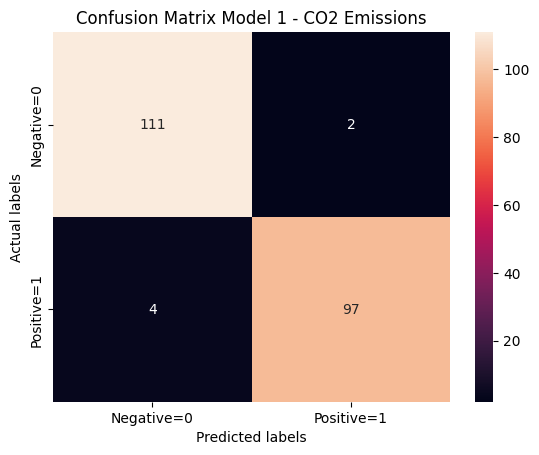

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

ax = plt.subplot()
sns.heatmap(confusion_matrix1, annot=True, ax = ax, fmt='d')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.set_title('Confusion Matrix Model 1 - CO2 Emissions')
ax.xaxis.set_ticklabels(['Negative=0', 'Positive=1'])
ax.yaxis.set_ticklabels(['Negative=0', 'Positive=1']);
plt.show();

In [ ]:
confusion_matrix2 = confusion_matrix(y_test, y_pred2)
confusion_matrix2

array([[111,   2],
       [  1, 100]])

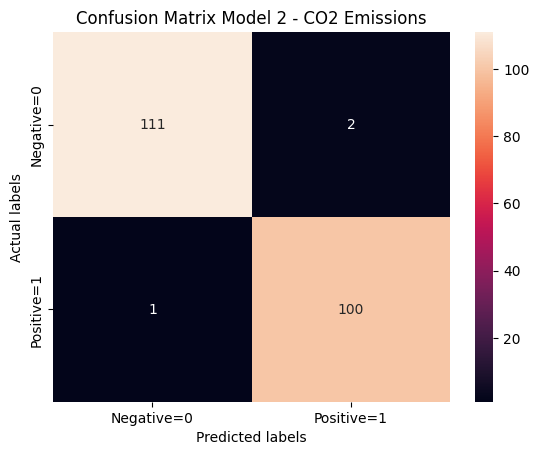

In [ ]:
ax = plt.subplot()
sns.heatmap(confusion_matrix2, annot=True, ax = ax, fmt='d')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.set_title('Confusion Matrix Model 2 - CO2 Emissions')
ax.xaxis.set_ticklabels(['Negative=0', 'Positive=1'])
ax.yaxis.set_ticklabels(['Negative=0', 'Positive=1']);
plt.show();

In [ ]:
confusion_matrix3 = confusion_matrix(y_test, y_pred3)
confusion_matrix3

array([[111,   2],
       [  7,  94]])

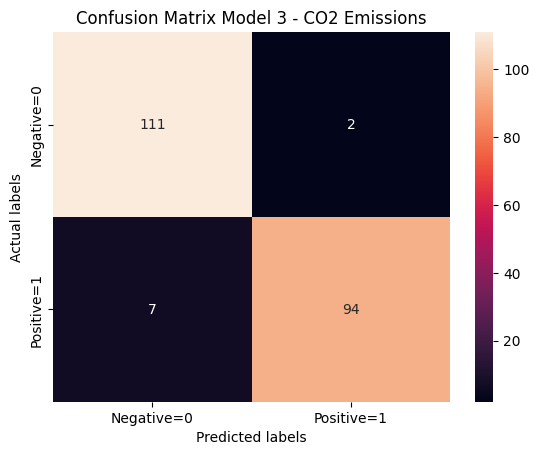

In [ ]:
ax = plt.subplot()
sns.heatmap(confusion_matrix3, annot=True, ax = ax, fmt='d')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.set_title('Confusion Matrix Model 3 - CO2 Emissions')
ax.xaxis.set_ticklabels(['Negative=0', 'Positive=1'])
ax.yaxis.set_ticklabels(['Negative=0', 'Positive=1']);
plt.show();

In [ ]:
confusion_matrix4 = confusion_matrix(y_test, y_pred4)
confusion_matrix4

array([[113,   0],
       [101,   0]])

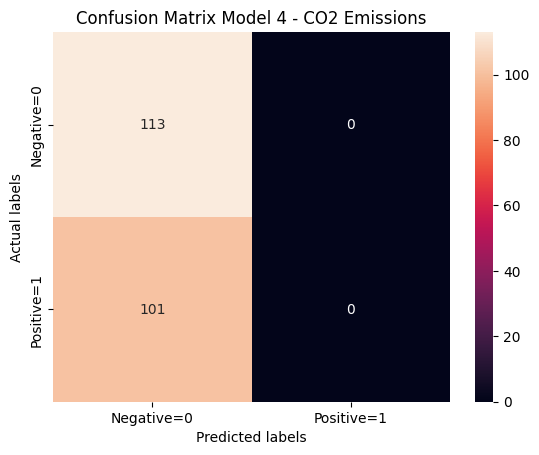

In [ ]:
ax = plt.subplot()
sns.heatmap(confusion_matrix4, annot=True, ax = ax, fmt='d')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.set_title('Confusion Matrix Model 4 - CO2 Emissions')
ax.xaxis.set_ticklabels(['Negative=0', 'Positive=1'])
ax.yaxis.set_ticklabels(['Negative=0', 'Positive=1']);
plt.show();

In [ ]:
confusion_matrix5 = confusion_matrix(y_test, y_pred5)
confusion_matrix5

array([[110,   3],
       [  1, 100]])

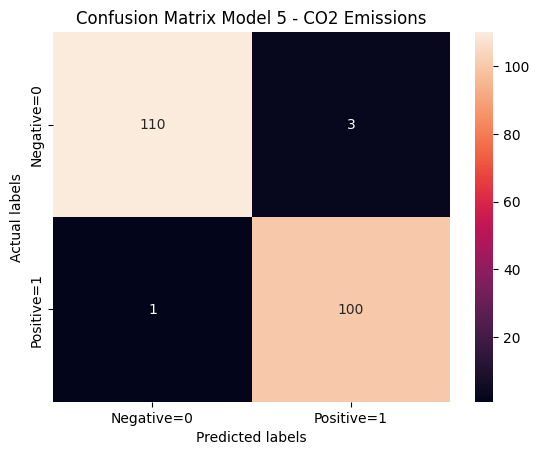

In [ ]:
ax = plt.subplot()
sns.heatmap(confusion_matrix5, annot=True, ax = ax, fmt='d')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.set_title('Confusion Matrix Model 5 - CO2 Emissions')
ax.xaxis.set_ticklabels(['Negative=0', 'Positive=1'])
ax.yaxis.set_ticklabels(['Negative=0', 'Positive=1']);
plt.show();

## 5) Hiperparametros que permiten mejor accuracy

el modelo 5 cuenta con los hiperparámetros que permiten mejor accuracy en este caso, los cuales son:

- activation : tanh
- solver : lbfgs
- hidden_layer_sizes : 25,5,19,2


## 6) Se varía otro hiperparámetro (learning_rate)

In [ ]:
modelo6 = MLPClassifier(activation='tanh',solver='lbfgs',hidden_layer_sizes=(25,5,19,2), random_state=123,learning_rate='invscaling')
modelo6.fit(X_train, y_train)
scores6 = cross_val_score(modelo5, X_train, y_train, cv=5, scoring='accuracy')
print(scores6)
scores6.mean()

[0.96491228 0.97076023 0.98245614 0.96470588 0.98235294]


0.9730374957000343

In [ ]:
modelo7 = MLPClassifier(activation='tanh',solver='lbfgs',hidden_layer_sizes=(25,5,19,2), random_state=123,learning_rate='adaptive')
modelo7.fit(X_train, y_train)
scores7 = cross_val_score(modelo5, X_train, y_train, cv=5, scoring='accuracy')
print(scores6)
scores6.mean()

[0.96491228 0.97076023 0.98245614 0.96470588 0.98235294]


0.9730374957000343

In [ ]:
y_pred6 = modelo6.predict(X_test)
y_pred6

array([0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
y_pred7 = modelo7.predict(X_test)
y_pred7

array([0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
accuracy6 = accuracy_score(y_test, y_pred6)
accuracy6

0.9813084112149533

In [ ]:
accuracy7 = accuracy_score(y_test, y_pred7)
accuracy7

0.9813084112149533

In [ ]:
accuracies = {
    "Model": ["model 5", "model 6", "model 7"],
    "Accuracy": [accuracy5, accuracy6, accuracy7]
}
pd.DataFrame(accuracies)

,Model,Accuracy
0,model 5,0.981308
1,model 6,0.981308
2,model 7,0.981308
